In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("day.csv", sep=',')
     
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [90]:
for i in range(len(df["dteday"])):
  r = df["dteday"][i].split("-")
  buff = ""
  for q in r:
    buff = buff + q
  df["dteday"][i] = int(buff)
df

<ipython-input-90-1d88c53facfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dteday"][i] = int(buff)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1012018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2012018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3012018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4012018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5012018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27122019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28122019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29122019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30122019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [80]:
X = df.drop(columns = ['temp'])
y = df["temp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
w0 = model.intercept_
w0

-0.9641728947731103

In [83]:
w1 = model.coef_
w1

array([ 3.57644656e-02, -2.82289574e-08, -2.84668977e-02, -1.30372799e+01,
       -1.07696953e+00,  3.40452495e-01,  1.55382129e-02,  2.43694025e-01,
        6.70837973e-02,  9.07564359e-01, -2.68446202e-03,  3.50415107e-02,
        1.53546469e-04, -8.16182407e-05,  7.19308497e-05])

y = instant*3.57644656e-02 + dteday * -2.82289574e-08 + season * -2.84668977e-02 + yr * -1.30372799e+01 + mnth * -1.07696953e+00 + holiday * 3.40452495e-01 + weekday * 1.55382129e-02 + workingday * 2.43694025e-01 + weathersit * 6.70837973e-02 + temp * 9.07564359e-01 + atemp * -2.68446202e-03 + hum * 3.50415107e-02 + windspeed * 1.53546469e-04 + casual * -8.16182407e-05 + cnt * 7.19308497e-05 

In [84]:
y_pred = model.predict(X_test)

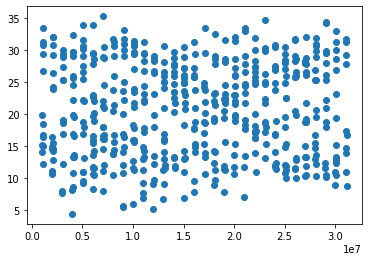

In [85]:
fig, ax = plt.subplots()
ax.scatter(X_train['dteday'], y_train)
plt.show()
     

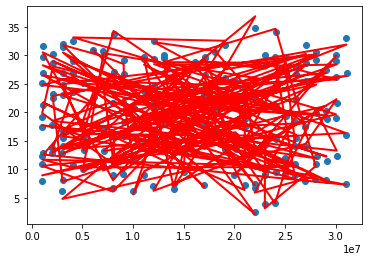

In [86]:
plt.scatter(X_test['dteday'], y_test)
plt.plot(X_test['dteday'], y_pred, color='red', linewidth=2);
plt.show()

In [87]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5220643996938449
Mean Squared Error: 0.40041018450815197
R2 score: 0.9932239243377095


Модель работатет хорошо, R2 очень близка к единице,
MAE и MSE - средние, нормальные значения